Epoch [1/30], Step [100/938], Loss: 0.5609
Epoch [1/30], Step [200/938], Loss: 0.3167
Epoch [1/30], Step [300/938], Loss: 0.3241
Epoch [1/30], Step [400/938], Loss: 0.3874
Epoch [1/30], Step [500/938], Loss: 0.4644
Epoch [1/30], Step [600/938], Loss: 0.1524
Epoch [1/30], Step [700/938], Loss: 0.3031
Epoch [1/30], Step [800/938], Loss: 0.2918
Epoch [1/30], Step [900/938], Loss: 0.1454
Train Accuracy: 89.40%
Test Accuracy: 98.12%
Test Loss: 0.0603
Epoch [2/30], Step [100/938], Loss: 0.0650
Epoch [2/30], Step [200/938], Loss: 0.0577
Epoch [2/30], Step [300/938], Loss: 0.0632
Epoch [2/30], Step [400/938], Loss: 0.0596
Epoch [2/30], Step [500/938], Loss: 0.1123
Epoch [2/30], Step [600/938], Loss: 0.1244
Epoch [2/30], Step [700/938], Loss: 0.0670
Epoch [2/30], Step [800/938], Loss: 0.2649
Epoch [2/30], Step [900/938], Loss: 0.0411
Train Accuracy: 95.80%
Test Accuracy: 98.59%
Test Loss: 0.0442
Epoch [3/30], Step [100/938], Loss: 0.0776
Epoch [3/30], Step [200/938], Loss: 0.1599
Epoch [3/30], 

Epoch [19/30], Step [200/938], Loss: 0.0032
Epoch [19/30], Step [300/938], Loss: 0.0630
Epoch [19/30], Step [400/938], Loss: 0.0041
Epoch [19/30], Step [500/938], Loss: 0.0169
Epoch [19/30], Step [600/938], Loss: 0.0098
Epoch [19/30], Step [700/938], Loss: 0.0235
Epoch [19/30], Step [800/938], Loss: 0.0225
Epoch [19/30], Step [900/938], Loss: 0.0098
Train Accuracy: 98.91%
Test Accuracy: 99.15%
Test Loss: 0.0353
Epoch [20/30], Step [100/938], Loss: 0.0073
Epoch [20/30], Step [200/938], Loss: 0.0719
Epoch [20/30], Step [300/938], Loss: 0.1390
Epoch [20/30], Step [400/938], Loss: 0.0717
Epoch [20/30], Step [500/938], Loss: 0.0226
Epoch [20/30], Step [600/938], Loss: 0.0133
Epoch [20/30], Step [700/938], Loss: 0.0011
Epoch [20/30], Step [800/938], Loss: 0.0704
Epoch [20/30], Step [900/938], Loss: 0.0243
Train Accuracy: 98.99%
Test Accuracy: 99.08%
Test Loss: 0.0366
Epoch [21/30], Step [100/938], Loss: 0.0517
Epoch [21/30], Step [200/938], Loss: 0.0666
Epoch [21/30], Step [300/938], Loss: 0

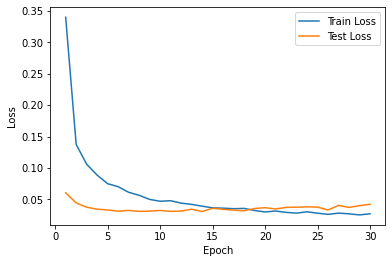

Confusion Matrix:
[[ 978    0    0    0    0    0    1    1    0    0]
 [   0 1133    1    0    0    0    0    1    0    0]
 [   1    3 1021    1    1    0    0    5    0    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    0    0  974    0    1    0    1    6]
 [   2    0    0    5    0  883    1    0    0    1]
 [   2    3    0    1    1    3  948    0    0    0]
 [   0    3    4    1    0    0    0 1020    0    0]
 [   4    1    1    1    1    0    1    3  959    3]
 [   1    2    0    1    6    3    0    6    3  987]]


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from models.models import CNN, CNN_d



# Set random seed for reproducibility
torch.manual_seed(42)

# Set device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)



# Define data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)



#  Create an instance of the CNN
model = CNN_d().to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Initialize lists to store the train and test losses for each epoch
train_losses = []
test_losses = []

num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    correct = 0
    total = 0

    for batch_idx, (images, labels) in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (batch_idx + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    print(f'Train Accuracy: {(100 * correct / total):.2f}%')

    # Evaluation on the test set
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_loss /= len(test_loader)
    test_losses.append(test_loss)

    # Print test accuracy at the end of each epoch
    test_accuracy = (100 * correct / total)
    print(f'Test Accuracy: {test_accuracy:.2f}%')
    print(f'Test Loss: {test_loss:.4f}')

# Plot the train and test losses for each epoch
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Calculate and display the confusion matrix
model.eval()
y_true = []
y_pred = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_true.extend(labels.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)